In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import datetime
from datetime import timedelta
from sklearn import metrics
import matplotlib.backends.backend_pdf as pdf_backend
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import json

tensorflow.test.gpu_device_name()

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
title = "SWaT_Dataset_Attack_v0"
df = pd.read_csv("/content/drive/MyDrive/CI Project/" + title + ".csv")

In [3]:
df_attack = df[[' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', 'Normal/Attack']]
print(df_attack)

                      Timestamp    FIT101    LIT101   MV101  P101  P102  \
0        28/12/2015 10:00:00 AM  2.427057  522.8467       2     2     1   
1        28/12/2015 10:00:01 AM  2.446274  522.8860       2     2     1   
2        28/12/2015 10:00:02 AM  2.489191  522.8467       2     2     1   
3        28/12/2015 10:00:03 AM  2.534350  522.9645       2     2     1   
4        28/12/2015 10:00:04 AM  2.569260  523.4748       2     2     1   
...                         ...       ...       ...     ...   ...   ...   
449914      2/1/2016 2:59:55 PM  2.559972  519.5495       2     2     1   
449915      2/1/2016 2:59:56 PM  2.549082  520.4131       2     2     1   
449916      2/1/2016 2:59:57 PM  2.531467  520.6878       2     2     1   
449917      2/1/2016 2:59:58 PM  2.521218  520.7271       2     2     1   
449918      2/1/2016 2:59:59 PM  2.501681  521.1196       2     2     1   

       Normal/Attack  
0             Normal  
1             Normal  
2             Normal  
3      

In [4]:
df_attack[' Timestamp'] = pd.to_datetime(df_attack[' Timestamp'])
print(df_attack)

                 Timestamp    FIT101    LIT101   MV101  P101  P102  \
0      2015-12-28 10:00:00  2.427057  522.8467       2     2     1   
1      2015-12-28 10:00:01  2.446274  522.8860       2     2     1   
2      2015-12-28 10:00:02  2.489191  522.8467       2     2     1   
3      2015-12-28 10:00:03  2.534350  522.9645       2     2     1   
4      2015-12-28 10:00:04  2.569260  523.4748       2     2     1   
...                    ...       ...       ...     ...   ...   ...   
449914 2016-02-01 14:59:55  2.559972  519.5495       2     2     1   
449915 2016-02-01 14:59:56  2.549082  520.4131       2     2     1   
449916 2016-02-01 14:59:57  2.531467  520.6878       2     2     1   
449917 2016-02-01 14:59:58  2.521218  520.7271       2     2     1   
449918 2016-02-01 14:59:59  2.501681  521.1196       2     2     1   

       Normal/Attack  
0             Normal  
1             Normal  
2             Normal  
3             Normal  
4             Normal  
...              ... 

<ipython-input-4-41957c7eabf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack[' Timestamp'] = pd.to_datetime(df_attack[' Timestamp'])


In [5]:
file_path = '/content/drive/MyDrive/CI Project/attack_times.json'
with open(file_path, 'r') as json_file:
    times = json.load(json_file)

In [6]:
def getTimeIndex(timeStamp):
  return df_attack[df_attack[' Timestamp'] == timeStamp].index.tolist()[0]

In [7]:
def graphCols(df_vals, attackType, point, start, end, buffer):
    time = datetime.timedelta(seconds=buffer)
    formatted_time = '{:02d}:{:02d}:{:02d}'.format(time.seconds // 3600, (time.seconds // 60) % 60, time.seconds % 60)
    buffer = pd.to_timedelta(formatted_time)
    start = pd.Timestamp(start)  # Convert start to Timestamp object
    end = pd.Timestamp(end)  # Convert end to Timestamp object
    start = start - buffer
    end = end + buffer
    figure_list = []

    # Loop through each column in the DataFrame
    for column in df_vals.columns:
        if column != ' Timestamp' and column != 'Normal/Attack':  # Exclude ' Timestamp' and 'Normal/Attack' columns
            fig, ax = plt.subplots()

            # Filter the data within the specified window
            window_data = df_vals[(df_vals[' Timestamp'] >= start) & (df_vals[' Timestamp'] <= end)]

            # Plot the column values within the window
            ax.plot(window_data[' Timestamp'], window_data[column], color='blue')

            # Highlight the values where 'Normal/Attack' column equals 'Attack' within the start and end time range
            attack_indices = window_data[window_data['Normal/Attack'] == 'Attack'].index
            ax.scatter(window_data.loc[attack_indices, ' Timestamp'], window_data.loc[attack_indices, column], color='red')

            ax.set_title(attackType + "  on  " + point + "  |  " + column)
            ax.set_xlabel(' Timestamp')
            ax.set_ylabel('Value')

            figure_list.append(fig)

    return figure_list

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

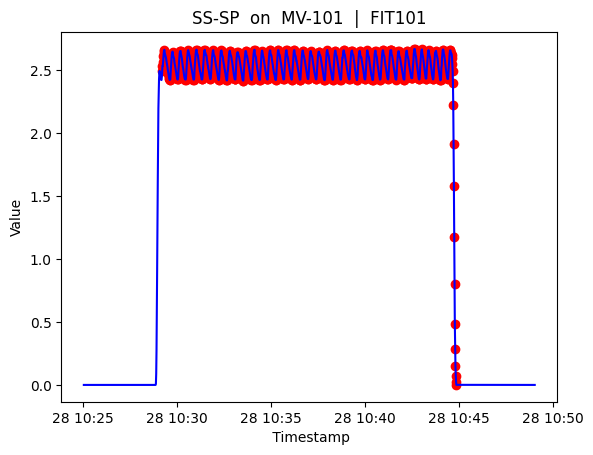

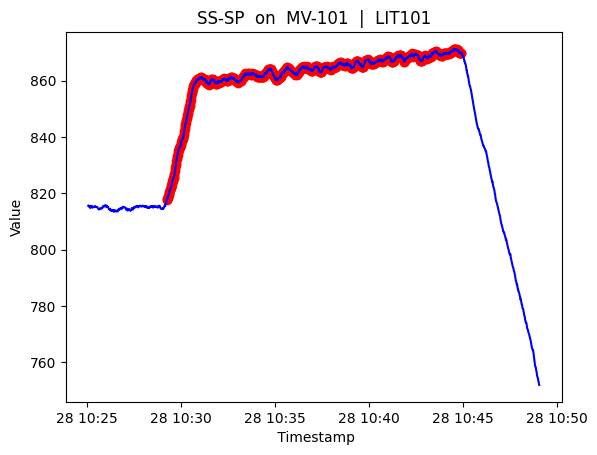

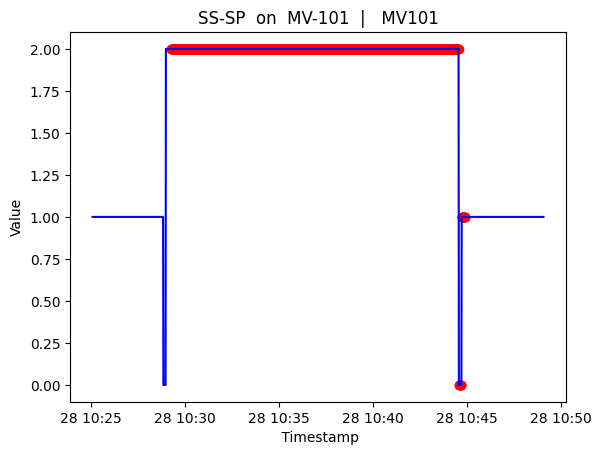

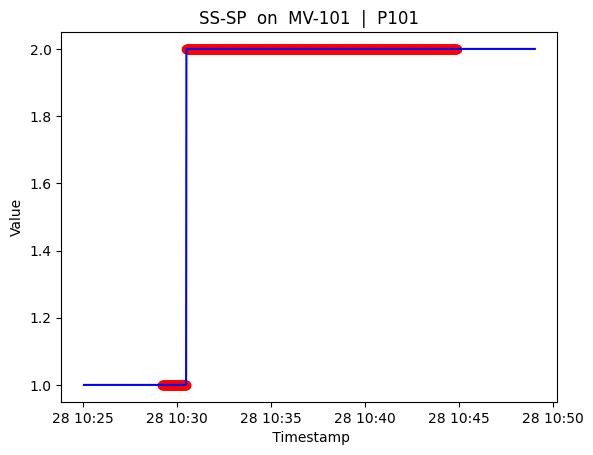

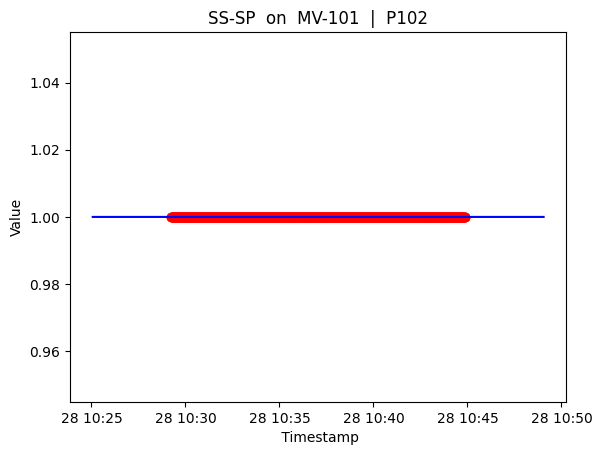

In [8]:
i = 0
bufferWidth = 250
graphCols(df_attack, times["Type"][i], times["Point"][i], times["Start"][i], times["End"][i], bufferWidth)

In [9]:
for i in df_attack.select_dtypes('object').columns:
    le_attack = LabelEncoder().fit(df_attack[i])
    df_attack[i] = le_attack.transform(df_attack[i])
X_scaler_attack = MinMaxScaler()
X_data_attack = X_scaler_attack.fit_transform(df_attack[['FIT101', 'LIT101', ' MV101', 'P101', 'P102']])

<ipython-input-9-89589000029d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack[i] = le_attack.transform(df_attack[i])


In [10]:
x_attack = []
y_attack = []

for i in range(0, len(X_data_attack) - 5):
    indices = range(i, i + 5)
    x_attack.append(X_data_attack[indices])
    indicey = range(i + 5, i + 1 + 5)
    y_attack.append(X_data_attack[i + 5])

In [11]:
x_attack = np.array(x_attack)
y_attack = np.array(y_attack)

In [12]:
model = keras.models.load_model("/content/drive/MyDrive/CI Project/Single_Stage_Model/P1_Model.h5")

In [13]:
y_attack_pred = model.predict(x_attack)

14060/14060 [==============================] - 38s 2ms/step


In [14]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_true, y_pred)

    print('Evaluation metric results:')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}\n')

In [15]:
print("Normal data test set:")
timeseries_evaluation_metrics_func(y_attack, y_attack_pred)

print("Attack dataset:")
timeseries_evaluation_metrics_func(y_attack, y_attack_pred)

Normal data test set:
Evaluation metric results:
MSE: 0.0017126234392330533
MAE: 0.0045372767561594075
RMSE: 0.041383854813599144
R2: 0.7946603907524612

Attack dataset:
Evaluation metric results:
MSE: 0.0017126234392330533
MAE: 0.0045372767561594075
RMSE: 0.041383854813599144
R2: 0.7946603907524612



In [16]:
titleN = "SWaT_Dataset_Normal_v0"
df_normal = pd.read_csv("/content/drive/MyDrive/CI Project/" + titleN + ".csv")

df_normal = df_normal[['FIT101', 'LIT101', 'MV101', 'P101', 'P102']]
print(df_normal.iloc[:5])

     FIT101    LIT101  MV101  P101  P102
0  2.470294  261.5804      2     2     1
1  2.457163  261.1879      2     2     1
2  2.439548  260.9131      2     2     1
3  2.428338  260.2850      2     2     1
4  2.424815  259.8925      2     2     1


In [17]:
for i in df_normal.select_dtypes('object').columns:
    le_normal = LabelEncoder().fit(df_normal[i])
    df_normal[i] = le_normal.transform(df_normal[i])
X_scaler_normal = MinMaxScaler()
X_data_normal = X_scaler_normal.fit_transform(df_normal[['FIT101', 'LIT101', 'MV101', 'P101', 'P102']])

In [18]:
x_normal = []
y_normal = []

for i in range(0, len(X_data_normal) - 5):
    indices = range(i, i + 5)
    x_normal.append(X_data_normal[indices])
    indicey = range(i + 5, i + 1 + 5)
    y_normal.append(X_data_normal[i + 5])

In [19]:
x_normal = np.array(x_normal)
y_normal = np.array(y_normal)

In [20]:
y_normal_pred = model.predict(x_normal)

15525/15525 [==============================] - 37s 2ms/step


In [21]:
def mergeResiduals(y, y_pred):
    residuals = y - y_pred
    merged_res = np.zeros(len(residuals))

    for i, timestep in enumerate(residuals):
        sum_of_squares = sum(x ** 2 for x in timestep)
        merged_res[i] = np.sqrt(sum_of_squares)

    mean_squared_sum = np.mean(merged_res)
    merged_res -= mean_squared_sum

    return merged_res

In [22]:
normalResiduals = mergeResiduals(y_normal, y_normal_pred)
thresholdVal = 5 * np.std(normalResiduals)
k = (1 / 10) * thresholdVal

print(thresholdVal, k)

0.17361222458514028 0.017361222458514028


In [23]:
def getResiduals(residuals, attackType, point, start, end, buffer, threshold, k):
    residuals = residuals[start - buffer:end + buffer]

    cusum_abs = residuals

    x = np.arange(start - buffer, end + buffer)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, residuals[:len(x)], 'b-', label='Residuals')
    ax.axhline(threshold, color='purple', linestyle='--', label='Threshold Value')
    ax.axvline(x=start, color='g', linestyle='--', label='Attack Start')
    ax.axvline(x=end, color='r', linestyle='--', label='Attack End')
    ax.set_title(attackType + '  on  ' + point + '  |  Residuals')
    ax.set_xlabel('Time')
    ax.set_ylabel('Residuals')
    ax.legend()
    ax.grid(True)

    plt.show()

Start: 2015-12-28 10:29:14	End: 2015-12-28 10:44:53


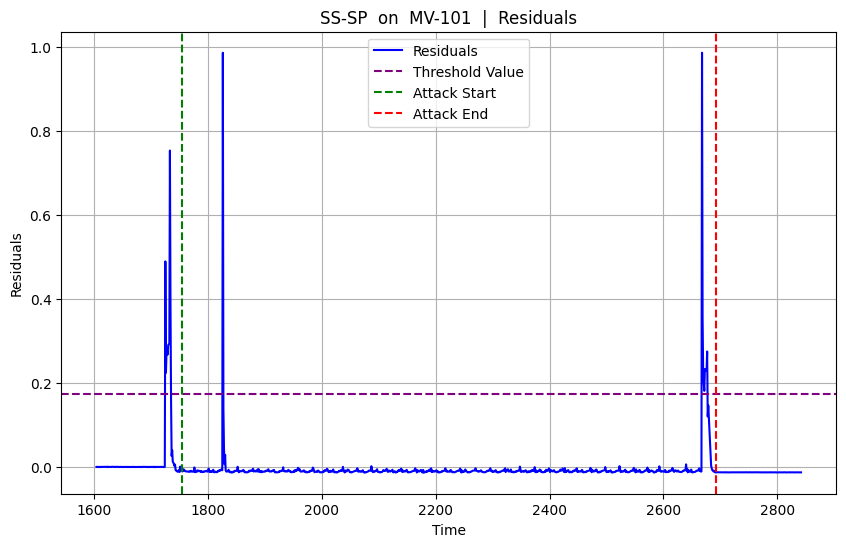

Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


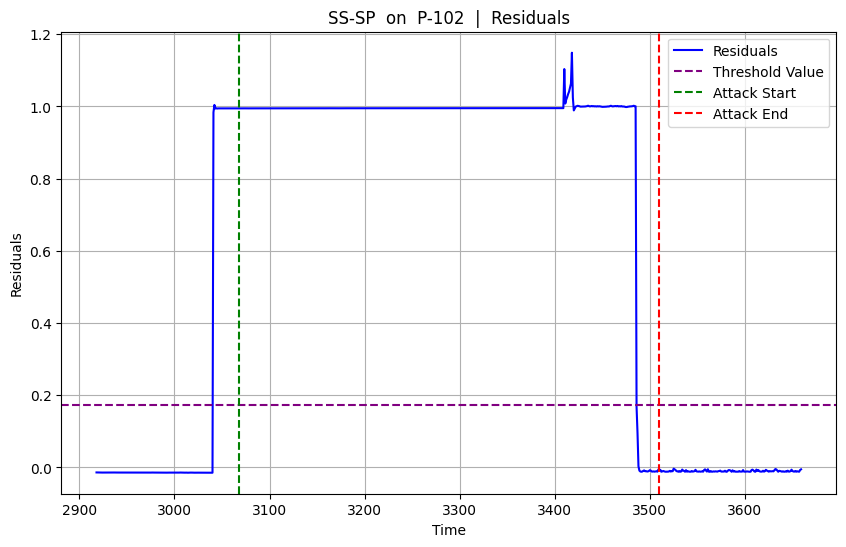

Start: 2015-12-28 11:22:00	End: 2015-12-28 11:28:22


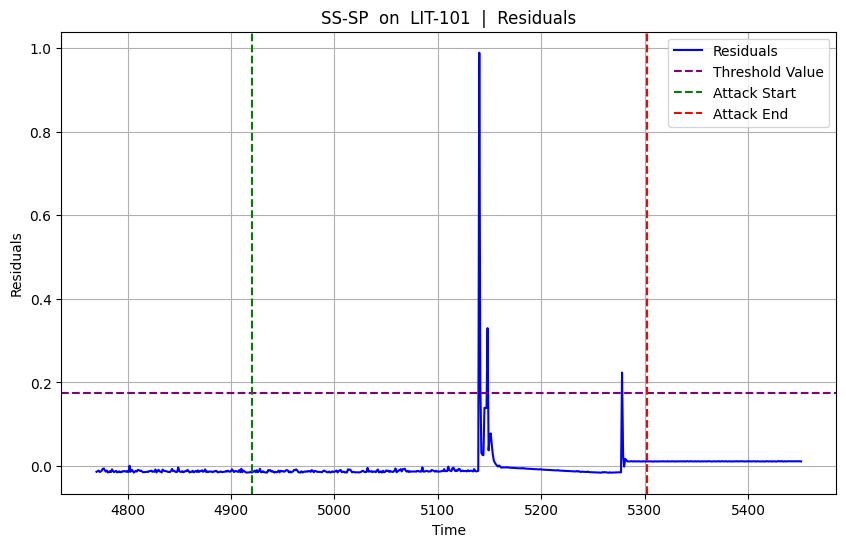

Start: 2015-12-28 11:47:39	End: 2015-12-28 11:54:08


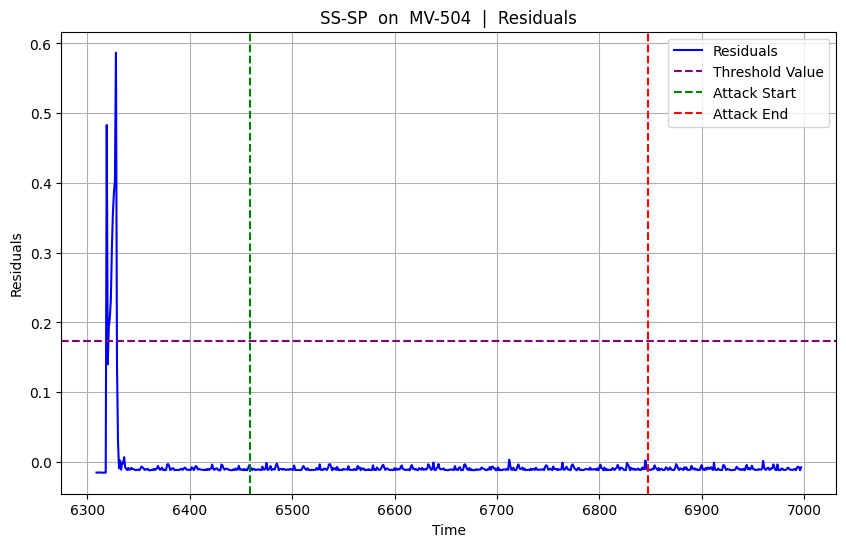

Start: 2015-12-28 12:00:55	End: 2015-12-28 12:04:10


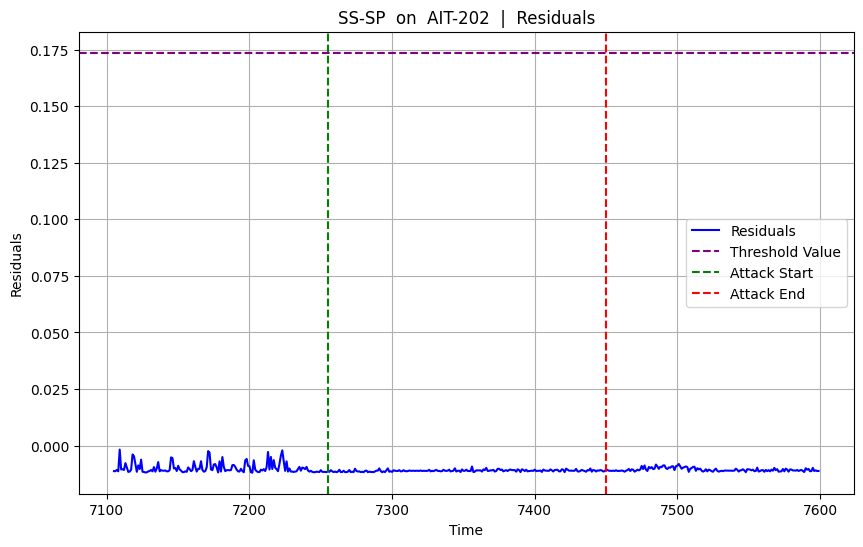

Start: 2015-12-28 12:08:25	End: 2015-12-28 12:15:33


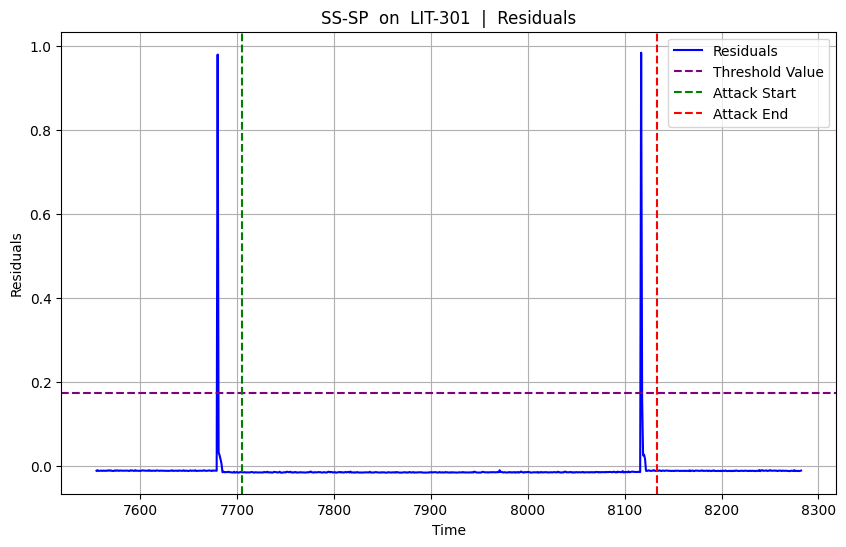

Start: 2015-12-28 13:10:10	End: 2015-12-28 13:26:13


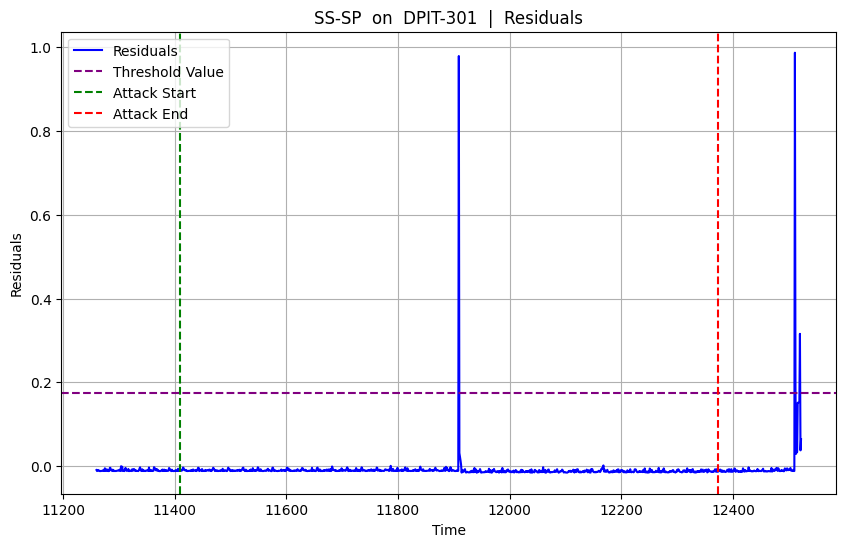

Start: 2015-12-28 14:16:20	End: 2015-12-28 14:28:20


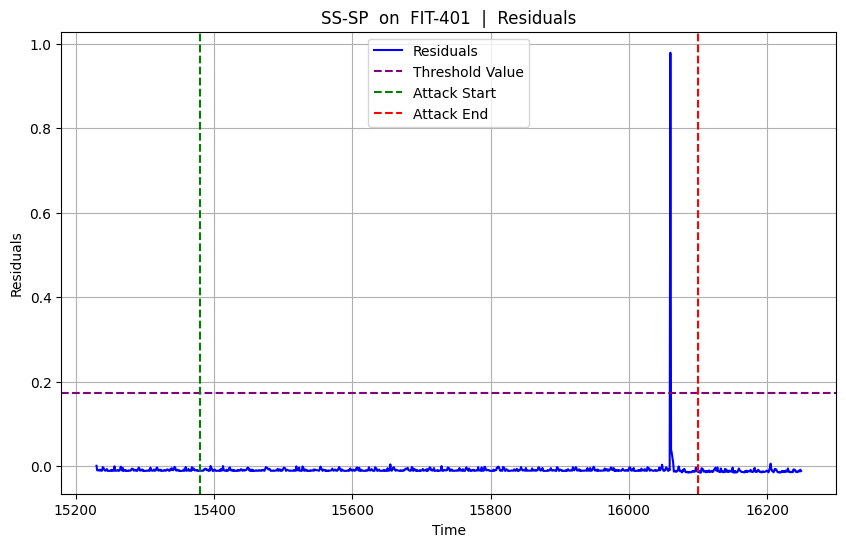

Start: 2015-12-29 11:11:25	End: 2015-12-29 11:15:17


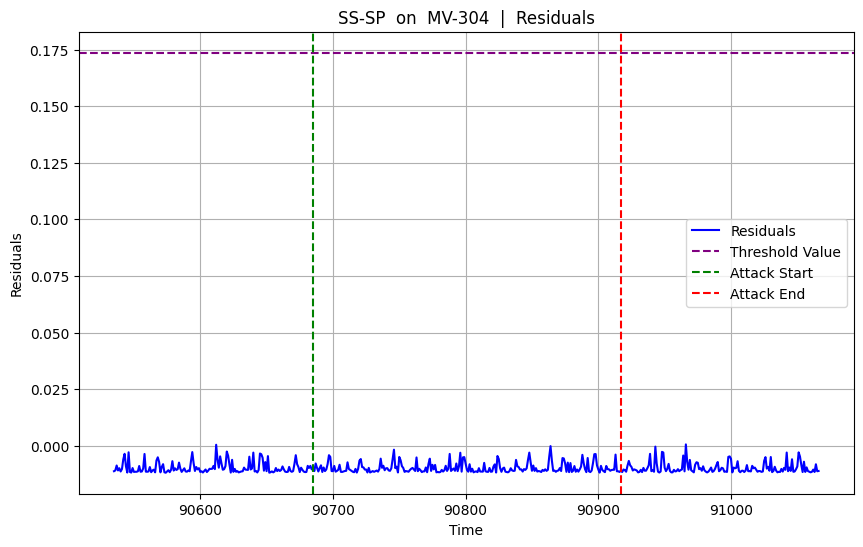

Start: 2015-12-29 11:35:40	End: 2015-12-29 11:42:50


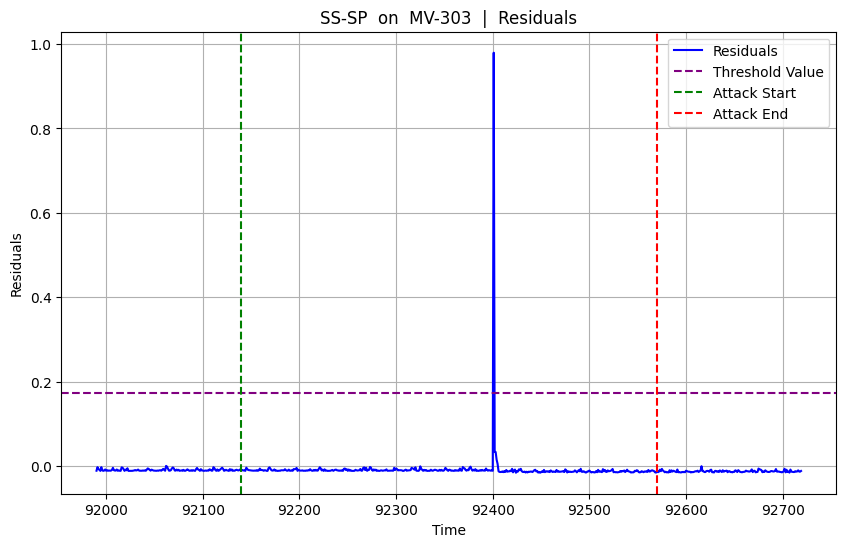

Start: 2015-12-29 11:57:25	End: 2015-12-29 12:02:00


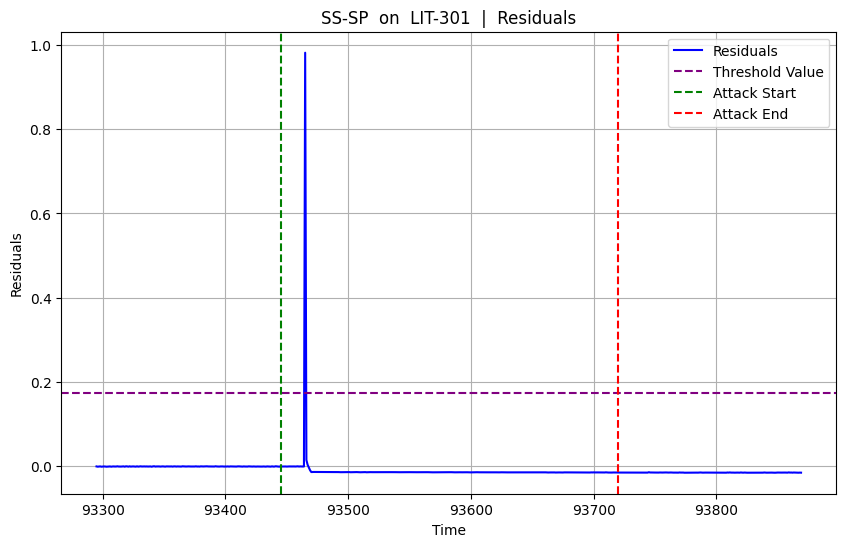

Start: 2015-12-29 14:38:12	End: 2015-12-29 14:50:08


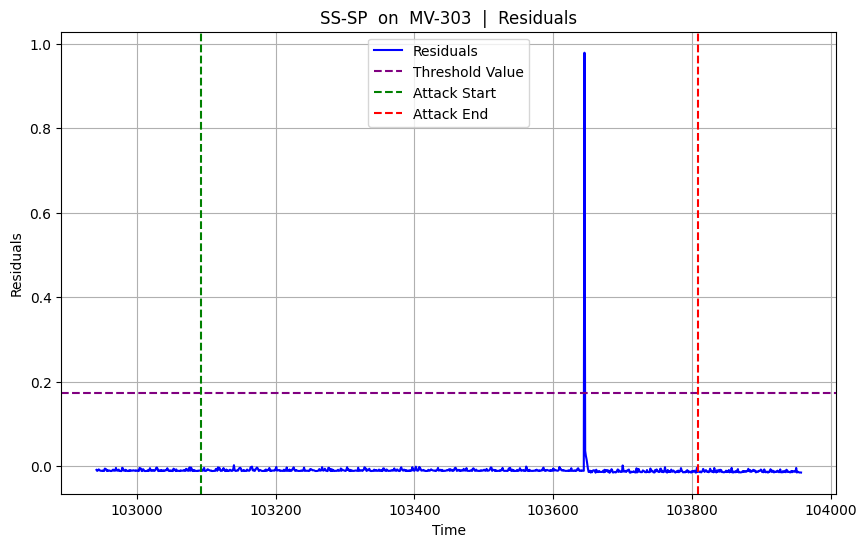

Start: 2015-12-29 18:10:43	End: 2015-12-29 18:15:01


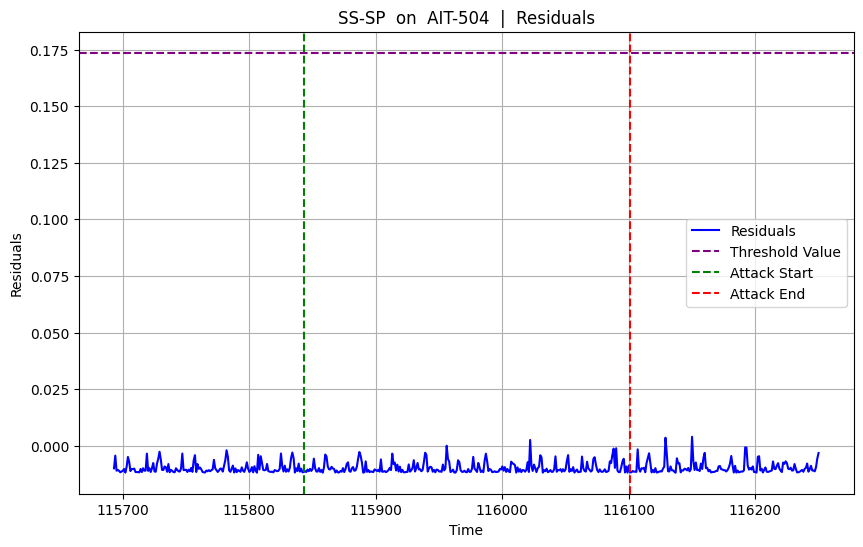

Start: 2015-12-29 18:15:43	End: 2015-12-29 18:22:17


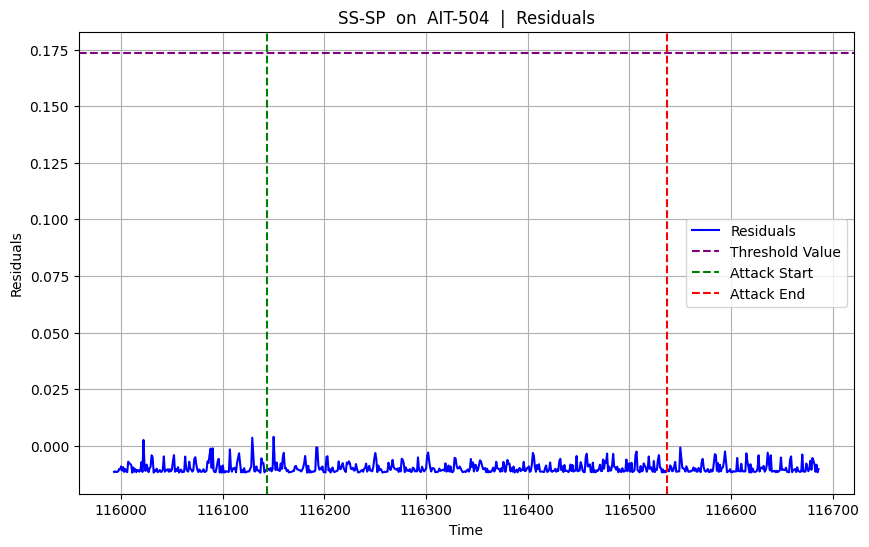

Start: 2015-12-29 18:30:00	End: 2015-12-29 18:42:00


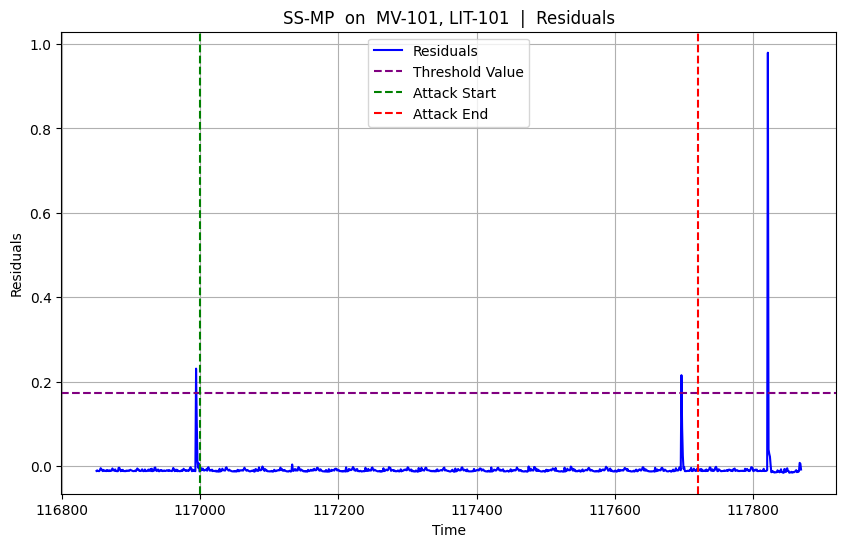

Start: 2015-12-29 22:55:18	End: 2015-12-29 23:03:00


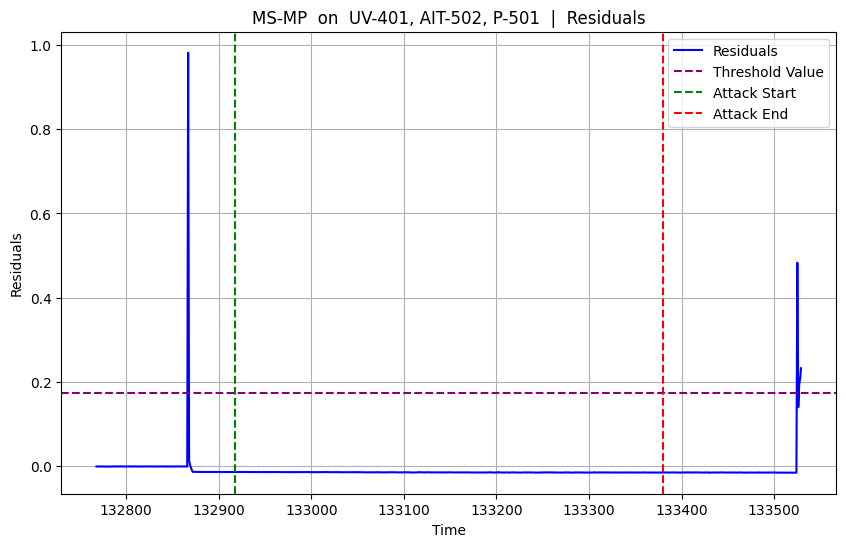

Start: 2015-12-30 01:42:34	End: 2015-12-30 01:54:10


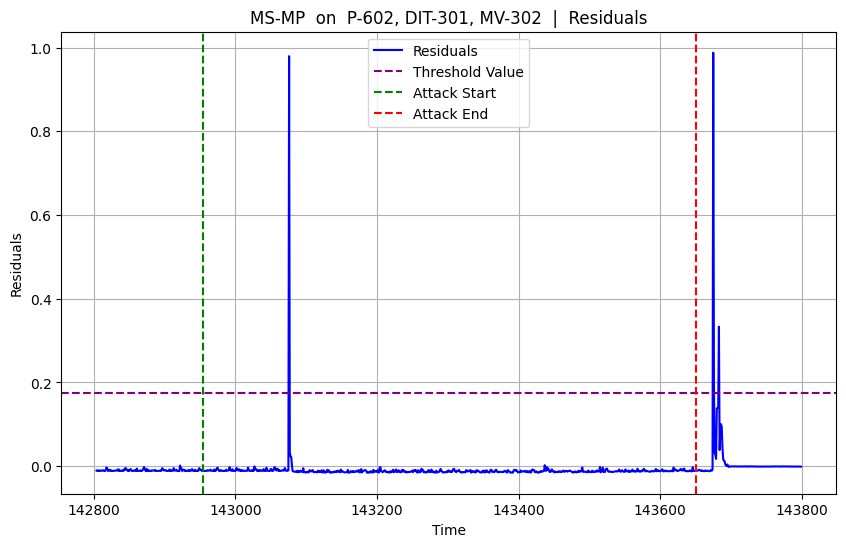

Start: 2015-12-30 09:51:45	End: 2015-12-30 09:56:28


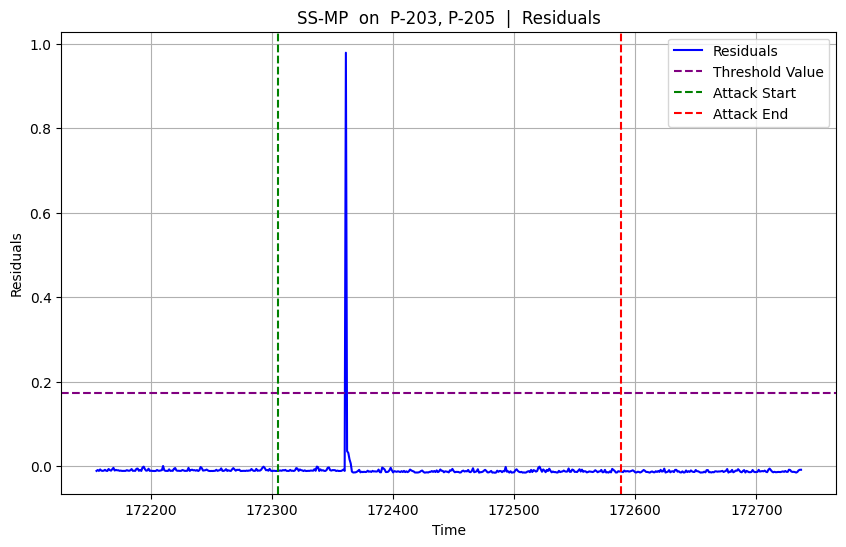

Start: 2015-12-30 10:01:50	End: 2015-12-30 10:12:01


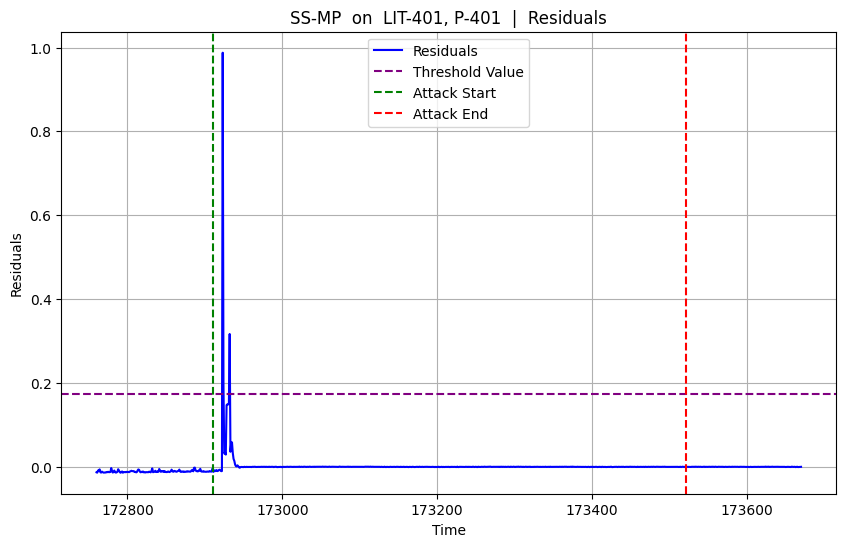

Start: 2015-12-30 17:04:56	End: 2015-12-30 17:29:00


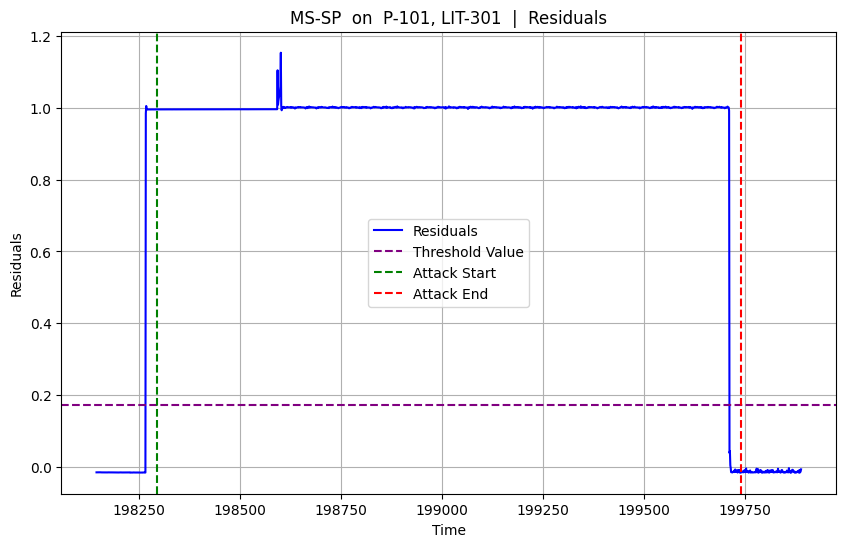

Start: 2015-12-31 01:17:08	End: 2015-12-31 11:15:27


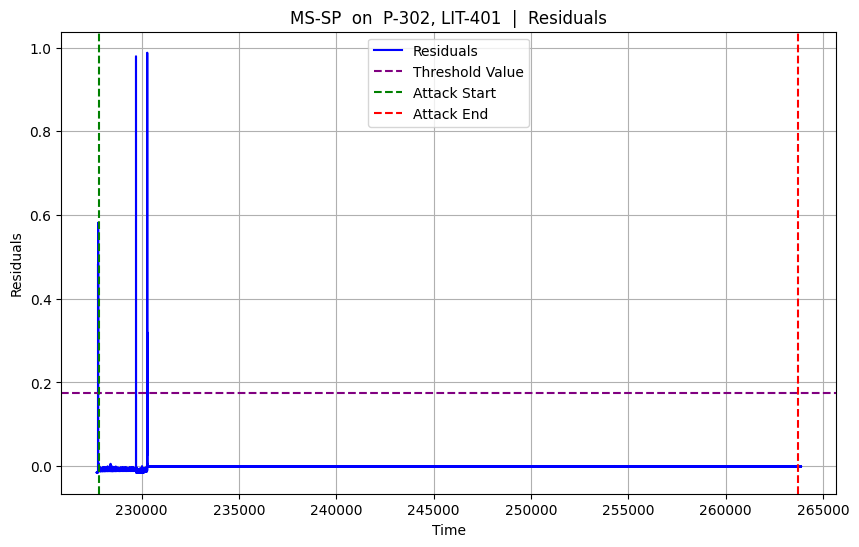

Start: 2015-12-31 15:32:00	End: 2015-12-31 15:34:00


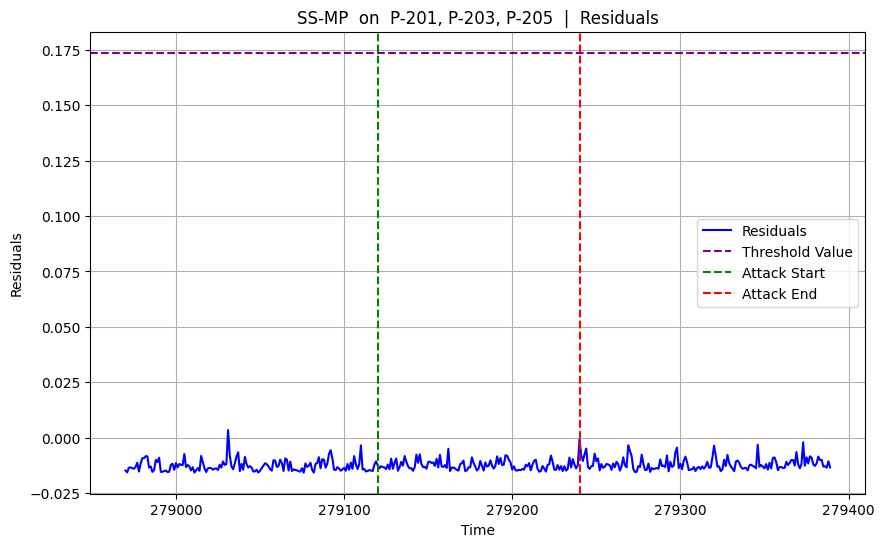

Start: 2015-12-31 15:47:40	End: 2015-12-31 16:07:10


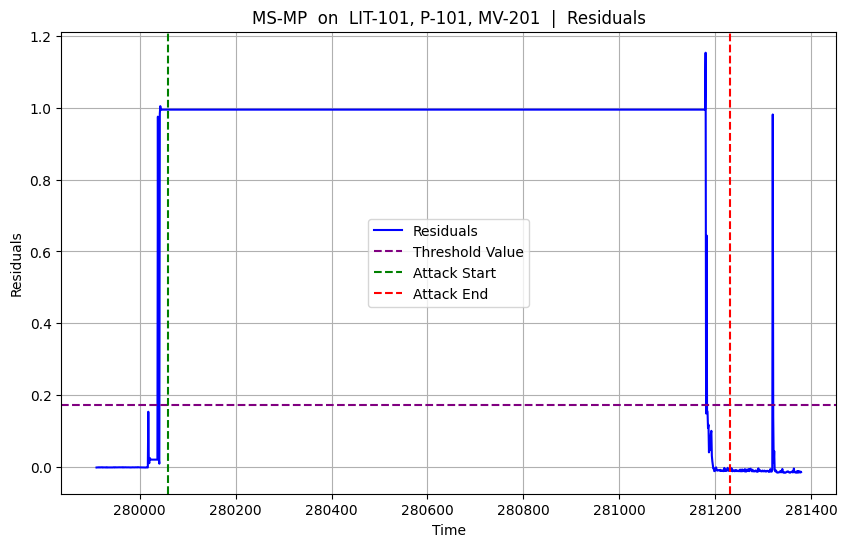

Start: 2015-12-31 22:05:34	End: 2015-12-31 22:11:40


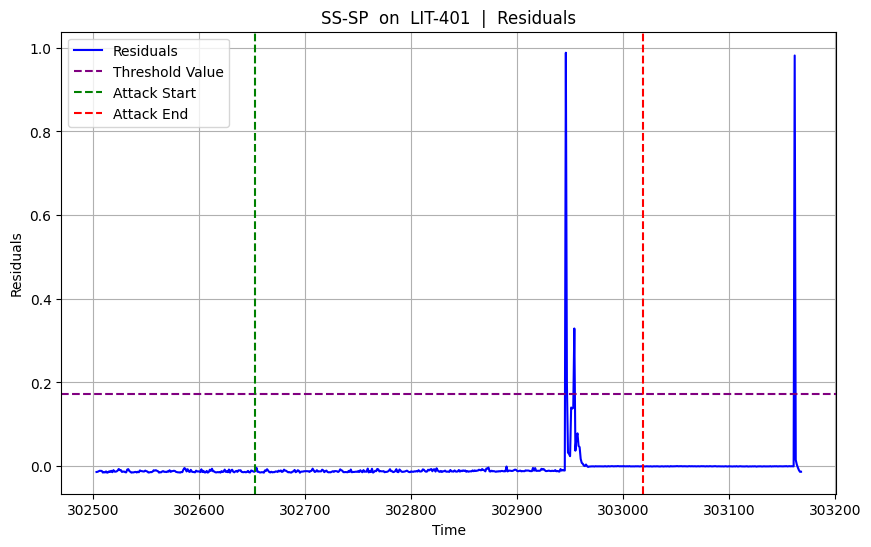

Start: 2016-01-01 10:36:00	End: 2016-01-01 10:46:00


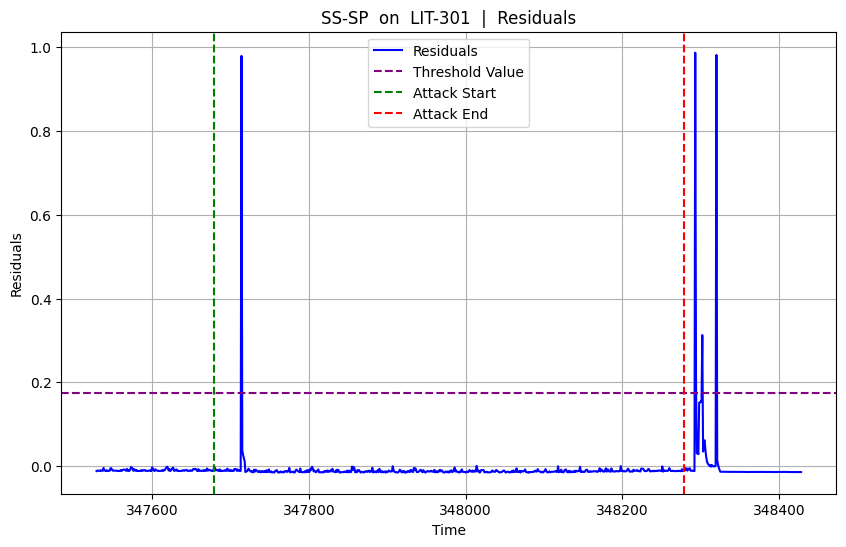

Start: 2016-01-01 14:21:12	End: 2016-01-01 14:28:35


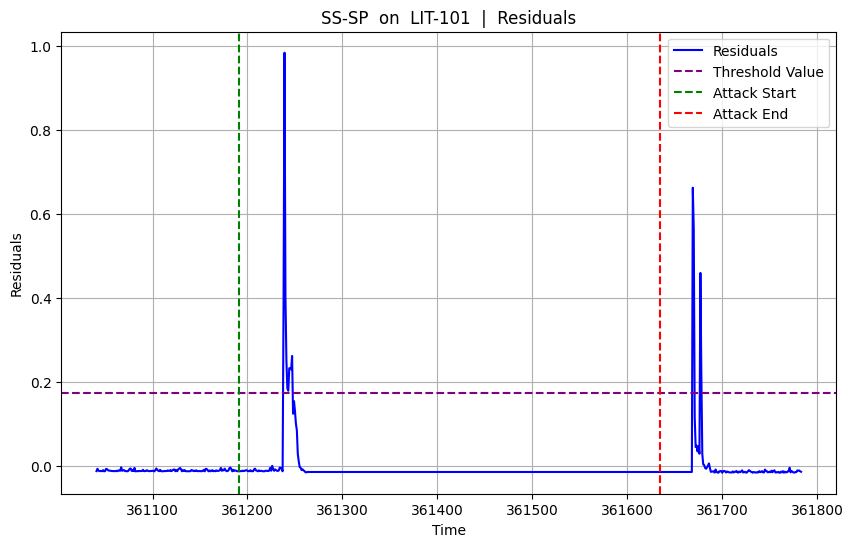

Start: 2016-01-01 17:12:40	End: 2016-01-01 17:14:20


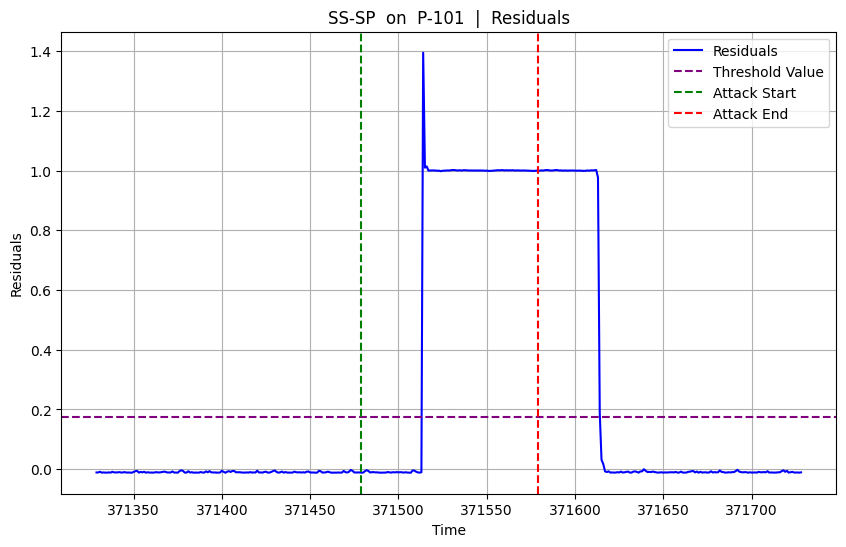

Start: 2016-01-01 17:18:56	End: 2016-01-01 17:26:56


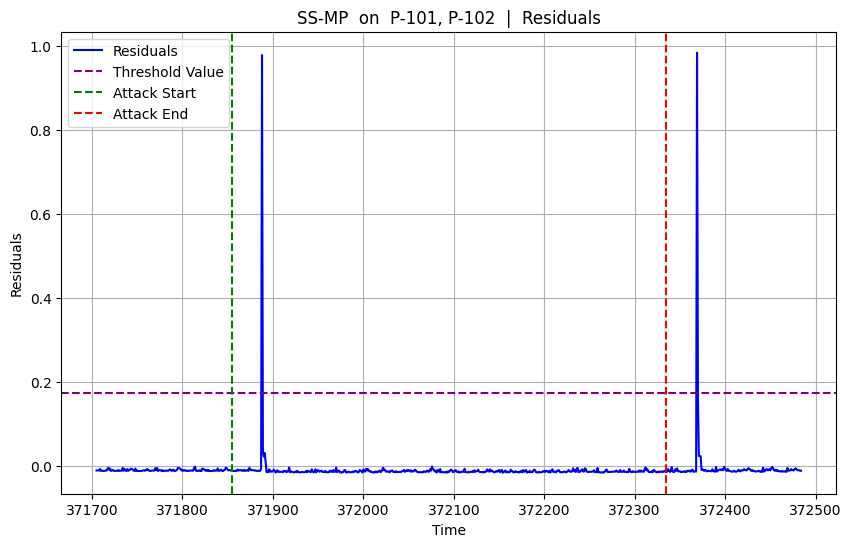

Start: 2016-01-01 22:16:01	End: 2016-01-01 22:25:00


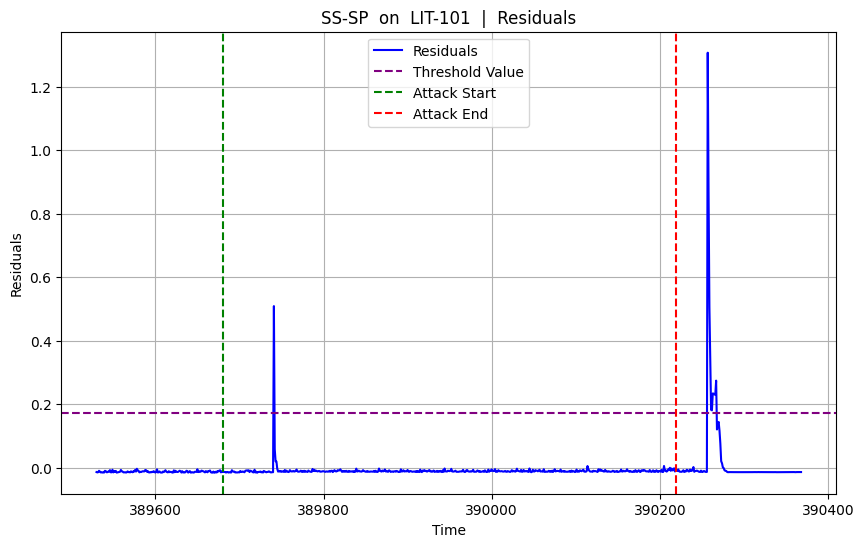

Start: 2016-02-01 11:17:02	End: 2016-02-01 11:24:50


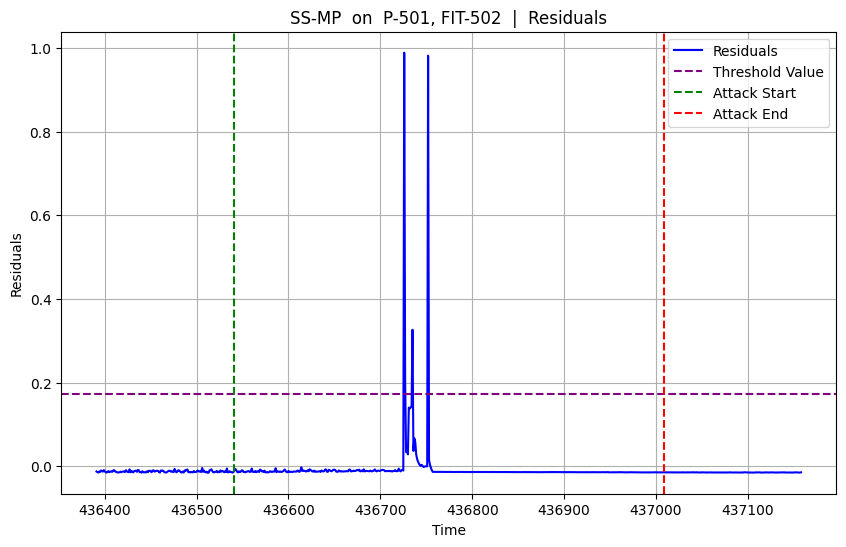

Start: 2016-02-01 11:31:38	End: 2016-02-01 11:36:18


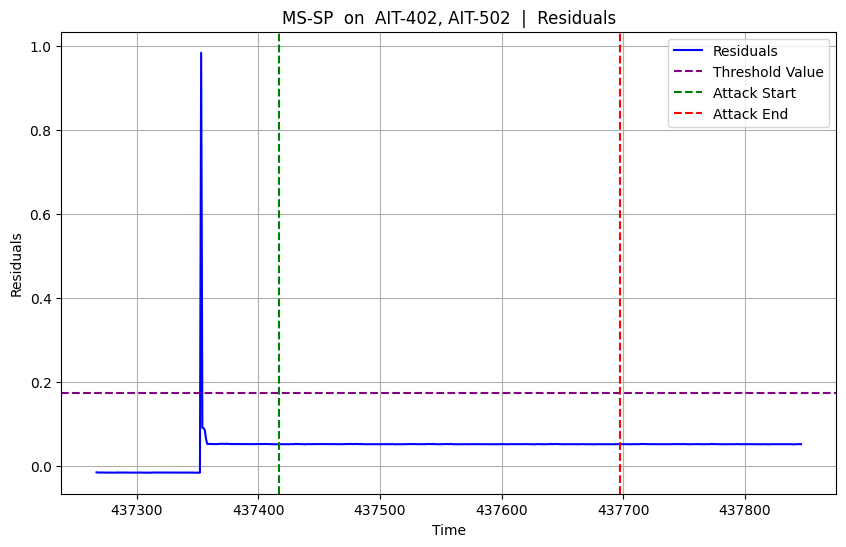

Start: 2016-02-01 11:43:48	End: 2016-02-01 11:50:28


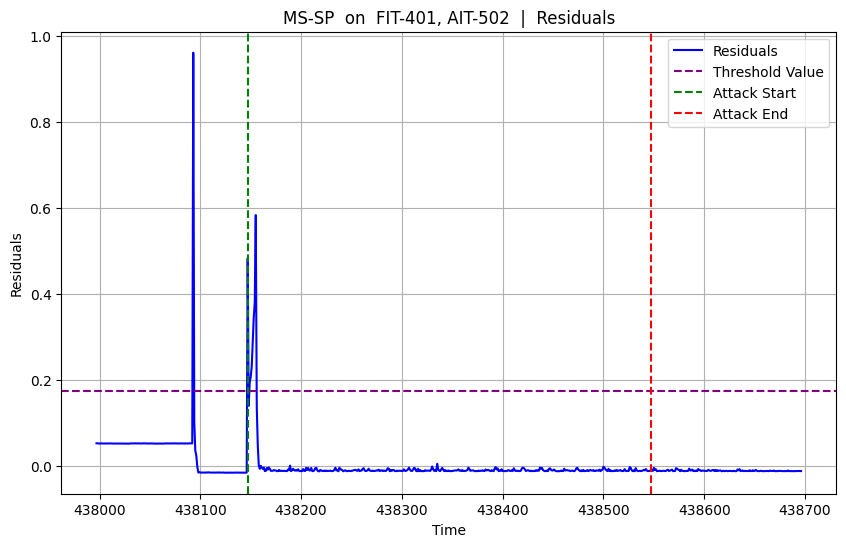

Start: 2016-02-01 11:51:42	End: 2016-02-01 11:56:38


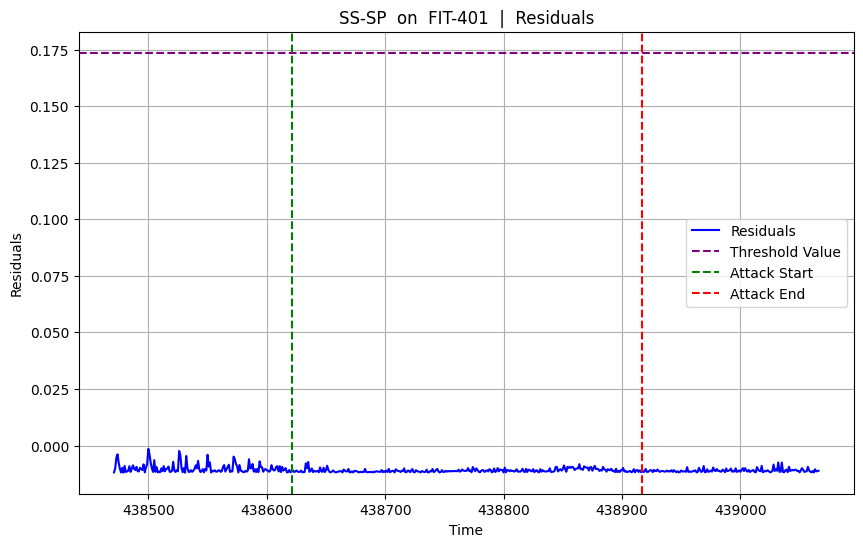

Start: 2016-02-01 13:13:02	End: 2016-02-01 13:41:11


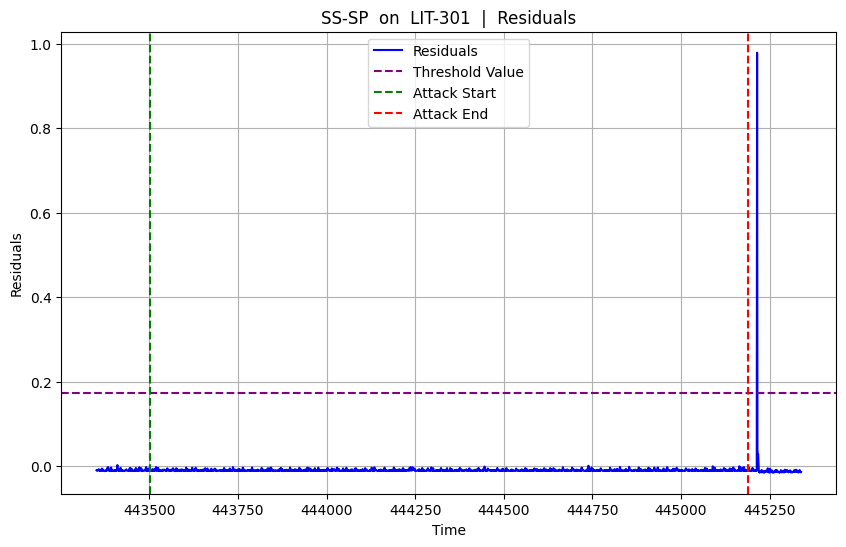

In [24]:
residuals = mergeResiduals(y_attack, y_attack_pred)
for i in range(len(times["Start"])):
  bufferWidth = 150
  print("Start: " + times["Start"][i] + "\tEnd: " + times["End"][i])
  getResiduals(residuals, times["Type"][i], times["Point"][i],  getTimeIndex(times["Start"][i]), getTimeIndex(times["End"][i]), bufferWidth, thresholdVal, k)

In [25]:
def detectAnomalies(residuals, intervals, threshold, buffer1, buffer2):
    anomaly_dict = {}
    for intType in intervals["Type"]:
      anomaly_dict[intType] = []  # Initialize the list for each interval type

    results = []
    delays = []

    truePositive = 0    # 1 | 1
    falsePositive = 0   # 0 | 1
    falseNegative = 0   # 1 | 0
    trueNegative = 0    # 0 | 0

    for i in range(len(intervals["Type"])):
        intStart = intervals["Start"][i]
        intEnd = intervals["End"][i]
        intPoint = intervals["Point"][i]
        intType = intervals["Type"][i]

        if intType != 'Non-Attack':
            start_idx = getTimeIndex(intStart)
            end_idx = getTimeIndex(intEnd)
        else:
            start_idx = intStart
            end_idx = intEnd

        # Add a three minute buffer after the attack finishes
        above_threshold_indices = np.where(residuals[start_idx - buffer1 :end_idx + buffer2] > threshold)[0]

        if intType != 'Non-Attack':
          if above_threshold_indices.size > 0:
              delays.append(above_threshold_indices[0])
              truePositive += 1
              anomaly_dict[intType].append(f"True Positive\t- {intPoint}   -   Delay: {above_threshold_indices[0]} time steps")
          else:
              falseNegative += 1
              anomaly_dict[intType].append(f"False Negative\t- {intPoint}")
        else:
          if above_threshold_indices.size > 0:
              falsePositive += 1
              anomaly_dict[intType].append(f"False Positive\t- {intPoint}")
          else:
              trueNegative += 1
              anomaly_dict[intType].append(f"True Negative\t- {intPoint}")

    results.append(truePositive)
    results.append(falseNegative)
    results.append(falsePositive)
    results.append(trueNegative)

    return anomaly_dict, results, delays

In [26]:
# Create normal_times dictionary with all points set to "N/A"
normal_times = {
    'Start': [getTimeIndex(start_time) for start_time in times['Start']],
    'End': [getTimeIndex(end_time) for end_time in times['End']],
    'Point': ['N/A'] * len(times['Point']),  # Set all points to "N/A"
    'Type': ['Non-Attack'] * len(times['Type'])  # Set all types to "Non-Attack"
}

# Print the resulting normal_times dictionary
print(normal_times)

{'Start': [1754, 3068, 4920, 6459, 7255, 7705, 11410, 15380, 90685, 92140, 93445, 103092, 115843, 116143, 117000, 132918, 142954, 172305, 172910, 198296, 227828, 279120, 280060, 302653, 347679, 361191, 371479, 371855, 389680, 436541, 437417, 438147, 438621, 443501], 'End': [2693, 3510, 5302, 6848, 7450, 8133, 12373, 16100, 90917, 92570, 93720, 103808, 116101, 116537, 117720, 133380, 143650, 172588, 173521, 199740, 263727, 279240, 281230, 303019, 348279, 361634, 371579, 372335, 390219, 437009, 437697, 438547, 438917, 445190], 'Point': ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A'], 'Type': ['Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', 'Non-Attack', '

In [27]:
# Get the anomaly detection results for each interval
# added percetneges of timesteps that are over the threshold
anomaly_results_normal, values_normal, delays_normal = detectAnomalies(normalResiduals, normal_times, thresholdVal, 0, 0)

# Print the number of entries for each interval type
for key, value in anomaly_results_normal.items():
    print(key)
    for entry in value:
        print("\t", entry)

Non-Attack
	 False Positive	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 False Positive	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 False Positive	- N/A
	 False Positive	- N/A
	 True Negative	- N/A
	 False Positive	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 False Positive	- N/A
	 True Negative	- N/A
	 False Positive	- N/A
	 False Positive	- N/A
	 False Positive	- N/A
	 True Negative	- N/A
	 False Positive	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 False Positive	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 False Positive	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 True Negative	- N/A
	 True Negative	- N/A


In [28]:
def getResultsNormal(data):
    # Count False Positives and True Negatives
    false_positive_count = 0
    true_negative_count = 0

    for entry in data['Non-Attack']:
        if 'False Positive' in entry:
            false_positive_count += 1
        elif 'True Negative' in entry:
            true_negative_count += 1

    # Create a pie chart
    labels = ['False Positives', 'True Negatives']
    sizes = [false_positive_count, true_negative_count]
    colors = ['red', 'green']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add a title
    plt.title('P1 Model - Distribution of Normal Predictions')

    # Display the chart
    plt.show()

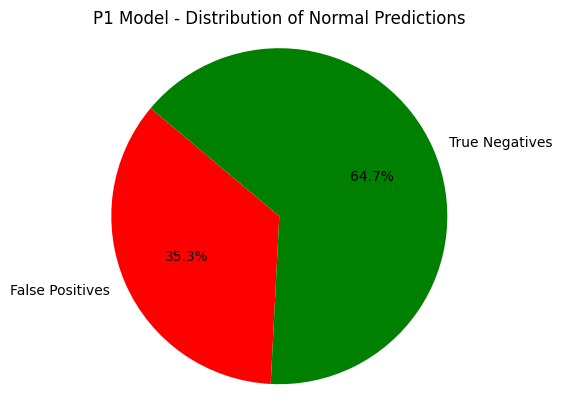

In [29]:
getResultsNormal(anomaly_results_normal)

In [30]:
# Get the anomaly detection results for each interval
residuals = mergeResiduals(y_attack, y_attack_pred)
anomaly_results_attack, values_attack, delays_attack = detectAnomalies(residuals, times, thresholdVal, 0, 180)

# Print the number of entries for each interval type
for key, value in anomaly_results_attack.items():
    print(key)
    for entry in value:
        print("\t", entry)

SS-SP
	 True Positive	- MV-101   -   Delay: 72 time steps
	 True Positive	- P-102   -   Delay: 0 time steps
	 True Positive	- LIT-101   -   Delay: 220 time steps
	 False Negative	- MV-504
	 False Negative	- AIT-202
	 True Positive	- LIT-301   -   Delay: 412 time steps
	 True Positive	- DPIT-301   -   Delay: 499 time steps
	 True Positive	- FIT-401   -   Delay: 680 time steps
	 False Negative	- MV-304
	 True Positive	- MV-303   -   Delay: 261 time steps
	 True Positive	- LIT-301   -   Delay: 20 time steps
	 True Positive	- MV-303   -   Delay: 553 time steps
	 False Negative	- AIT-504
	 False Negative	- AIT-504
	 True Positive	- LIT-401   -   Delay: 293 time steps
	 True Positive	- LIT-301   -   Delay: 35 time steps
	 True Positive	- LIT-101   -   Delay: 47 time steps
	 True Positive	- P-101   -   Delay: 35 time steps
	 True Positive	- LIT-101   -   Delay: 61 time steps
	 False Negative	- FIT-401
	 True Positive	- LIT-301   -   Delay: 1714 time steps
SS-MP
	 True Positive	- MV-101, LIT-1

In [31]:
def getResultsAttack(data):
    # Initialize counts
    true_positives = {'SS-SP': 0, 'SS-MP': 0, 'MS-MP': 0, 'MS-SP': 0}
    false_negatives = {'SS-SP': 0, 'SS-MP': 0, 'MS-MP': 0, 'MS-SP': 0}

    for attack_type, results in data.items():
        results = ' '.join(results)
        true_positives[attack_type] += results.count('True Positive')
        false_negatives[attack_type] += results.count('False Negative')

    # Prepare data for plotting
    attack_types = list(data.keys())
    x = range(len(attack_types))

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(x, true_positives.values(), width=0.4, label='True Positives', color='green')
    plt.bar([i + 0.4 for i in x], false_negatives.values(), width=0.4, label='False Negatives', color='red')
    plt.xlabel('Attack Type')
    plt.ylabel('Count')
    plt.title('P1 Model - Distribution of Predicted Attacks')
    plt.xticks([i + 0.2 for i in x], attack_types)
    plt.legend()
    plt.tight_layout()
    plt.show()

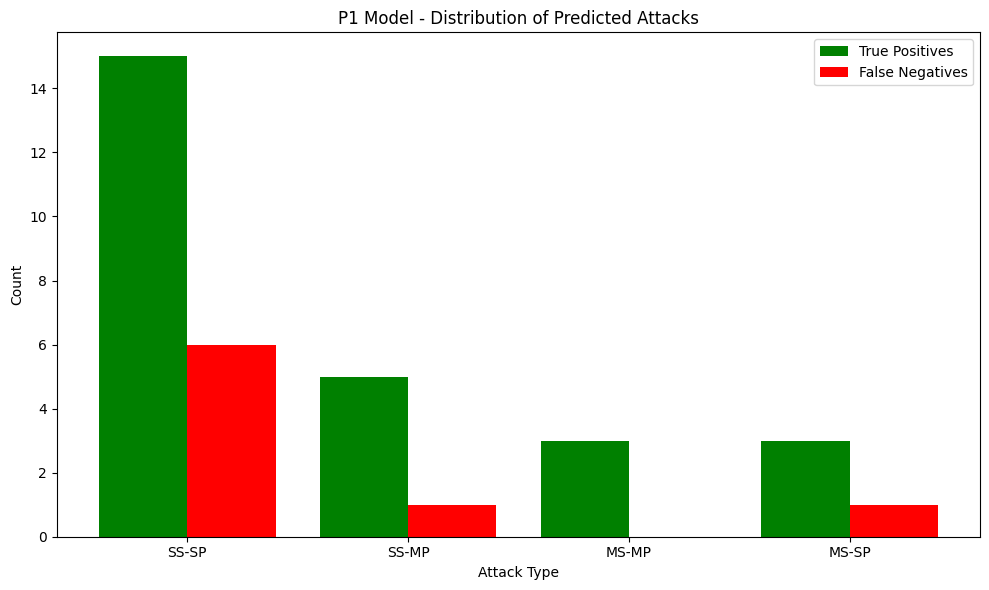

In [32]:
getResultsAttack(anomaly_results_attack)

In [33]:
print((len(times['Start']) - 8)/len(times['Start']))

0.7647058823529411


In [34]:
def plotDelayDistribution(delays):
    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(delays, bins=10, color='blue', alpha=0.7, edgecolor='black')  # Add edgecolor parameter

    # Calculate mean and add vertical line
    mean_delay = np.mean(delays)
    plt.axvline(x=mean_delay, color='red', linestyle='dashed', linewidth=2, label=('Mean = ' + str(round(mean_delay, 2))))

    # Customize plot
    plt.xlabel('Delay Time (Minutes)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Detection Delays')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

Mean:  5.243
Mean w/o Outliers:  3.267


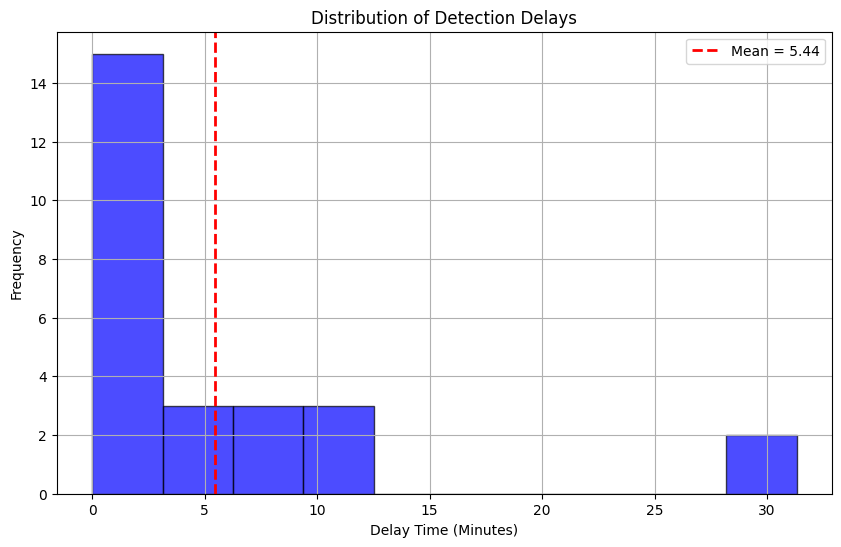

In [35]:
# Convert delay times from seconds to minutes
delays_minutes_attack = [delay / 60 for delay in delays_attack]

# Plot the distribution of delay times
print("Mean: ", round(np.mean([72, 0, 220, 412, 499, 680, 261, 20, 553, 696, 607, 122, 56, 13, 0, 1879, 0, 293, 35, 47, 35, 33, 61, 185, 0, 0, 1714]) / 60.0, 3))
print("Mean w/o Outliers: ", round(np.mean([72, 0, 220, 412, 499, 680, 261, 20, 553, 696, 607, 122, 56, 13, 0, 0, 293, 35, 47, 35, 33, 61, 185, 0, 0]) / 60.0, 3))
plotDelayDistribution(delays_minutes_attack)

In [36]:
intervals = [
    (1754, 2693), (3068, 3510), (4920, 5302), (6459, 6848), (7255, 7450),
    (7705, 8133), (11410, 12373), (15380, 16100), (90685, 90917), (92140, 92570),
    (93445, 93720), (103092, 103808), (115843, 116101), (116143, 116537), (117000, 117720),
    (132918, 133380), (142954, 143650), (172305, 172588), (172910, 173521), (198296, 199740),
    (227828, 263727), (279120, 279240), (280060, 281230), (302653, 303019), (347679, 348279),
    (361191, 361634), (371479, 371579), (371855, 372335), (389680, 390219), (436541, 437009),
    (437417, 437697), (438147, 438547), (438621, 438917), (443501, 445190)
]

In [37]:
sensors = np.array(df_attack[['FIT101', 'LIT101', ' MV101', 'P101', 'P102']].values.tolist()).T
# sensors = np.array(y_attack - y_attack_pred).T
# sensors = [mergeResiduals(y_attack, y_attack_pred).tolist()]


fit101 = sensors[0]
lit101 = sensors[1]
mv101 = sensors[2]
p101 = sensors[3]
p102 = sensors[4]

In [38]:
def getCusumLimits(data, target, b, upper_limit, lower_limit):
    SH = np.zeros(len(data))
    SL = np.zeros(len(data))
    abnormalInterval = False
    intStart = 0
    intEnd = 0
    intervals = []

    for i in range(1, len(data)):
        SH[i] = max(0, SH[i - 1] + data[i] - target - b)
        SL[i] = min(0, SL[i - 1] + data[i] - target + b)

        if SH[i] > upper_limit or SL[i] < lower_limit:
            if not abnormalInterval:
                intStart = i
                abnormalInterval = True
        elif abnormalInterval:
            intEnd = i - 1
            intervals.append([intStart, intEnd])
            abnormalInterval = False

    if abnormalInterval:
        intEnd = len(data) - 1
        intervals.append([intStart, intEnd])

    return intervals

In [39]:
lowerLimits = [-10, -10, -11, -11, -7]
upperLimits = [4, 10, 8, 8, 1]
anomaliesLimits = []

for i in range(0, 1):
    sensor = sensors[i]
    target = 0.05
    b = 0.05 * np.std(sensor)

    lowerLimit = lowerLimits[i]
    upperLimit = upperLimits[i]

    # upperLimit = np.mean(residuals) + 3 * np.std(residuals)
    # lowerLimit = np.mean(residuals) - 3 * np.std(residuals)

    print(upperLimit, lowerLimit)

    # Calculate CUSUM
    sensor_anomalies = getCusumLimits(sensor, target, b, upperLimit, lowerLimit)
    anomaliesLimits.append(sensor_anomalies)

4 -10


In [40]:
anomaliesLimits[0]

[[2, 449918]]

In [41]:
def getCusumK(data, m_hat, h, k):
    SH = np.zeros(len(data))
    SL = np.zeros(len(data))
    abnormalInterval = False
    intStart = 0
    intEnd = 0
    intervals = []

    for i in range(1, len(data)):
        SH[i] = max(0, SH[i - 1] + data[i] - m_hat - k)
        SL[i] = min(0, SL[i - 1] + m_hat - k - data[i])

        if SH[i] > h or SL[i] > h:
            if not abnormalInterval:
                intStart = i
                abnormalInterval = True
        elif abnormalInterval:
            intEnd = i - 1
            intervals.append([intStart, intEnd])
            abnormalInterval = False

    if abnormalInterval:
        intEnd = len(data) - 1
        intervals.append([intStart, intEnd])

    return intervals

In [42]:
def getCusumK(data, m_hat, h, k):
    SH = np.zeros(len(data))
    SL = np.zeros(len(data))
    abnormalInterval = False
    intStart = 0
    intEnd = 0
    intervals = []

    for i in range(1, len(data)):
        SH[i] = max(0, SH[i - 1] + data[i] - m_hat - k)
        SL[i] = min(0, SL[i - 1] + m_hat - k - data[i])

        if SH[i] > h or SL[i] > h:
            if not abnormalInterval:
                intStart = i
                abnormalInterval = True
        elif abnormalInterval:
            intEnd = i - 1
            intervals.append([intStart, intEnd])
            abnormalInterval = False

    if abnormalInterval:
        intEnd = len(data) - 1
        intervals.append([intStart, intEnd])

    return intervals

In [43]:
anomaliesK = []

for i in range(0, len(sensors)):
    sensor = sensors[i]
    m_hat = np.mean(sensor)
    h = 5 * np.std(sensor)
    k = (0.5) * np.std(sensor)
    sensor_anomalies = getCusumK(sensor, m_hat, h, k)
    anomaliesK.append(sensor_anomalies)

In [44]:
anomaliesK[4]

[[3046, 12217], [198273, 228033], [280047, 303515], [371519, 373551]]

In [45]:
# Generate sample data
np.random.seed(0)
data = np.random.randint(0, 100, size=449999)

# Define intervals
intervals = [
    (1754, 2693), (3068, 3510), (4920, 5302), (6459, 6848), (7255, 7450),
    (7705, 8133), (11410, 12373), (15380, 16100), (90685, 90917), (92140, 92570),
    (93445, 93720), (103092, 103808), (115843, 116101), (116143, 116537), (117000, 117720),
    (132918, 133380), (142954, 143650), (172305, 172588), (172910, 173521), (198296, 199740),
    (227828, 263727), (279120, 279240), (280060, 281230), (302653, 303019), (347679, 348279),
    (361191, 361634), (371479, 371579), (371855, 372335), (389680, 390219), (436541, 437009),
    (437417, 437697), (438147, 438547), (438621, 438917), (443501, 445190)
]

# Plot function
def plot_intervals(intervals_list, start, stop, delta, colors, labels):
    plt.figure(figsize=(10, 6))

    for intervals, color, label in zip(intervals_list, colors, labels):
        for start_idx, end_idx in intervals:
            plt.axvspan(start[start_idx], stop[end_idx], color=color, alpha=0.2, label=label)

    plt.xlim(start.min()-delta, stop.max()+delta)
    plt.ylim(0, 1)

    plt.xlabel('Index')
    plt.ylabel('Intervals')
    plt.title('Interval Plot')

    # Add a single legend entry for each color used
    legend_entries = [plt.Line2D([0], [0], color=color, marker='o', markersize=8) for color in colors]
    plt.legend(handles=legend_entries, labels=labels, loc='upper right')

    plt.show()

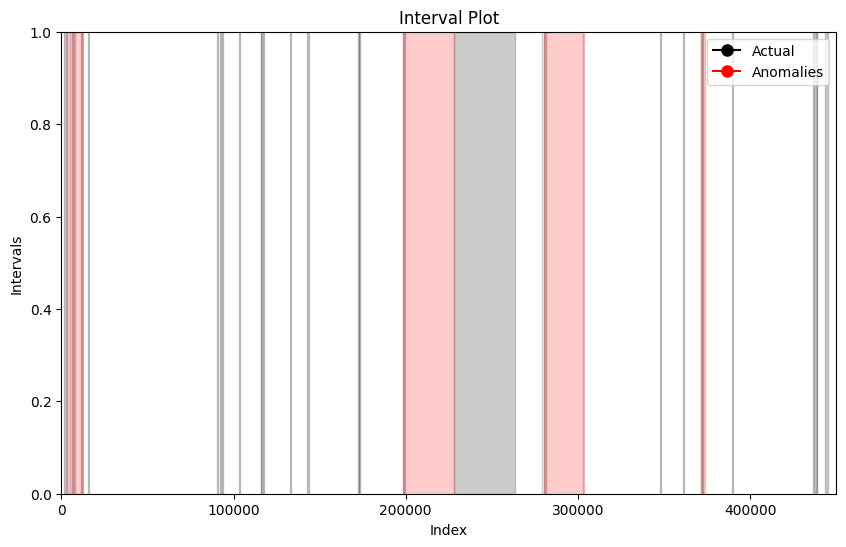

In [46]:
# Plot the intervals
delta = (data.max() - data.min()) / 10
colors = ['black', 'red']
labels = ['Actual', 'Anomalies']
plot_intervals([intervals, anomaliesK[4]], np.arange(len(data)), np.arange(len(data)) + 1, delta, colors, labels)

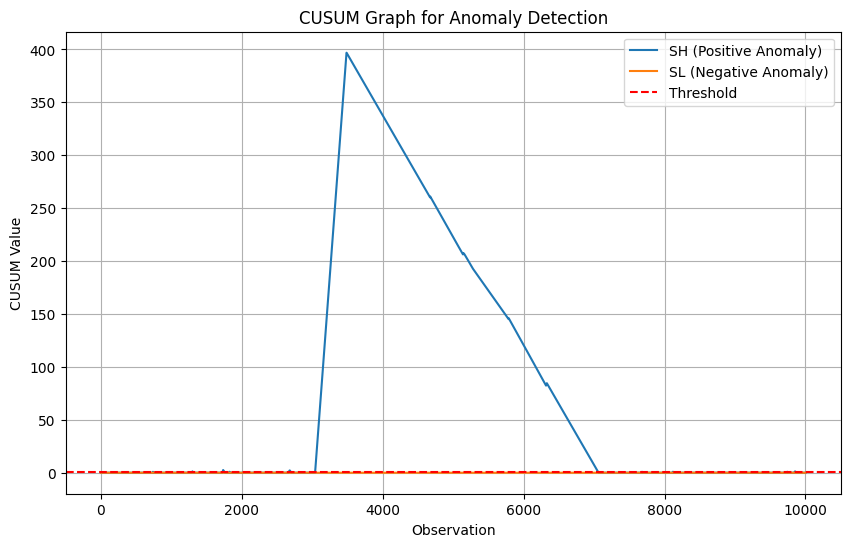

In [47]:
merged_residuals = mergeResiduals(y_attack, y_attack_pred)
merged_residuals = merged_residuals[0:10000]

# Parameters
k = (0.5) * np.std(merged_residuals)
threshold = 5 * np.std(merged_residuals)

# Calculate normalized residuals
normalized_residuals = merged_residuals

# Calculate CUSUM values
SH = np.zeros(len(normalized_residuals))
SL = np.zeros(len(normalized_residuals))
anomaly_intervals = []

for i in range(1, len(normalized_residuals)):
    SH[i] = max(0, SH[i - 1] + normalized_residuals[i] - k)
    SL[i] = max(0, SL[i - 1] - normalized_residuals[i] - k)

    if SH[i] > threshold:
        anomaly_intervals.append(i)

# Create a CUSUM graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(normalized_residuals)), SH, label='SH (Positive Anomaly)')
plt.plot(range(len(normalized_residuals)), SL, label='SL (Negative Anomaly)')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Observation')
plt.ylabel('CUSUM Value')
plt.title('CUSUM Graph for Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
sequential_groups = []
current_group = []

for i in range(len(anomaly_intervals) - 1):
    current_group.append(anomaly_intervals[i])
    if anomaly_intervals[i + 1] - anomaly_intervals[i] > 1:
        sequential_groups.append((current_group[0], current_group[-1]))
        current_group = []

# Add the last interval group
if len(current_group) > 0:
    sequential_groups.append((current_group[0], current_group[-1]))

print("Sequential Groups with Start and End Times:")
for start, end in sequential_groups:
    print(f"Start: {start}, End: {end}")

Sequential Groups with Start and End Times:
Start: 1302, End: 1302
Start: 1730, End: 1749
Start: 2669, End: 2691
Start: 3042, End: 7054
